## Model Creation and Evaluation

In [1]:
%%capture
#Load feature_selection-engineering file
%run feature_selection-engineering.ipynb

##### Random Forest Regressor

In [2]:
def model_eval(X_values, y_values):
    #Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_values, y_values, test_size=0.3, random_state=42)
    #Create the Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    #Train the model
    model.fit(X_train, y_train)
    #Make predictions
    y_pred = model.predict(X_test)

    #Model evaluation
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print("R-squared:", r2)
    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)

In [3]:
#With all features
model_eval(X, y)

R-squared: 0.9991637799008705
Mean Squared Error: 12.71863986060074
Mean Absolute Error: 0.5127778633931129


In [4]:
#With selected features
model_eval(dataset[selected], y)

R-squared: 0.9993095072080661
Mean Squared Error: 10.502174195632936
Mean Absolute Error: 0.447075171282766


In [5]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset[selected], y, test_size=0.3, random_state=42)
#Create the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
#Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#### Checking if the model is overfitting with Learning Curves

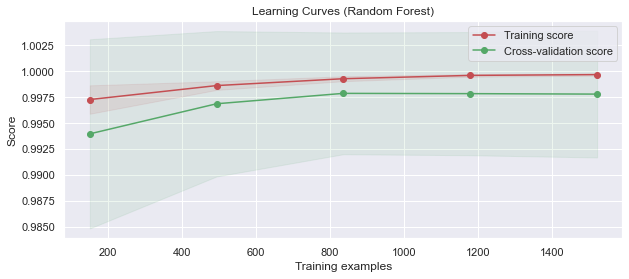

In [6]:
def plot_learning_curve(model, title, X, y, cv, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv = cv, train_sizes=train_sizes, n_jobs=-1)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 4))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

    plt.fill_between(train_sizes, train_mean - train_std,
                     train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mean - test_std,
                     test_mean + test_std, alpha=0.1, color="g")
    plt.legend()

#plot
plot_learning_curve(model, "Learning Curves (Random Forest)", X_train, y_train, cv=10)
plt.show()

In [7]:
#The cross validation score and training score are closer and converged
#So, we can deduce that the model is not overffiting